In [1]:
import os
import json


In [2]:
def get_number_of_models(file):
    with open(os.path.join(os.path.join("out","d4_compilation_stats"),file), 'r') as fp:
        data = json.load(fp)
    if data['Number of models']=="NaN":
        return -1
    return int(data['Number of models'])


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
def is_float(element):
    try:
        float(element)
        return True
    except ValueError:
        return False
    

In [5]:
data = {}
timeout = 600


In [6]:
def load_compilation_time(directory,col_name):
    data = {}
    for file in list(os.listdir(directory)):
        with open(os.path.join(directory,file), 'r') as fp:
            data_d4 = json.load(fp)
        data[file] = {}
        if (data_d4['Compilation time'] != "NaN" and  data_d4['Compilation time'] != -1) :
            data[file][col_name]=data_d4['Compilation time']
        else:
            data[file][col_name]=pd.NA
    return data

data_comp = pd.DataFrame.from_dict(data,orient='index')
data_comp

compil_key = "d4 compilation (seconds)"
tmp =load_compilation_time("out/d4_compilation_stats",compil_key)
for key in tmp:
    if key not in data:
        data[key]={}
    data[key].update(tmp[key])
data_comp = pd.DataFrame.from_dict(data,orient='index')
data_comp

,d4 compilation (seconds)
10.sk_1_46.json,0.065926
107.sk_3_90.json,0.328782
109.sk_4_36.json,0.330399
10random.json,0.06611
110.sk_3_88.json,0.815984
...,...
uf250-096.json,4.472293
uf250-097.json,1.417468
uf250-098.json,5.128157
uf250-099.json,5.273895


In [7]:
def load_jddnnf_data(directory, col_name):
    data = {}
    for file in list(os.listdir(directory)):
        with open(os.path.join(directory,file), 'r') as fp:
            data_j = json.load(fp)
        data[file] = {}
        for key,tmp in data_j.items():
            if tmp['total'] != "TIMEOUT":
                for key2 in tmp:
                    data[file][col_name % (key2,key)]=tmp[key2]
            else:
                for key2 in tmp:
                    data[file][col_name % (key2,key)]=pd.NA
    return data

jddnnf_key = "jddnnf %s %s"
tmp = load_jddnnf_data("out/top10_config_jddnnf",jddnnf_key)
for key in tmp:
    if key not in data:
        data[key]={}
    data[key].update(tmp[key])

In [8]:
data_df = pd.DataFrame.from_dict(data,orient='index')
data_df

,d4 compilation (seconds),jddnnf parsing 0,jddnnf smoothing 0,jddnnf top 0,jddnnf total 0
10.sk_1_46.json,0.065926,0.046,0.063,0.062,0.374064
107.sk_3_90.json,0.328782,0.075,0.088,0.178,0.566675
109.sk_4_36.json,0.330399,0.055,0.076,0.118,0.474080
10random.json,0.06611,0.017,0.021,0.035,0.164751
110.sk_3_88.json,0.815984,0.041,0.068,0.295,0.517182
...,...,...,...,...,...
uf250-097.json,1.417468,0.014,0.026,0.018,0.168256
uf250-098.json,5.128157,0.035,0.126,0.131,0.420397
uf250-099.json,5.273895,0.016,0.031,0.026,0.221583
UserServiceImpl.sk_8_32.json,0.567395,0.031,0.083,0.076,0.321647


In [9]:
data_df["compile+total"] = data_df["d4 compilation (seconds)"]+data_df["jddnnf total 0"]
data_df

,d4 compilation (seconds),jddnnf parsing 0,jddnnf smoothing 0,jddnnf top 0,jddnnf total 0,compile+total
10.sk_1_46.json,0.065926,0.046,0.063,0.062,0.374064,0.43999
107.sk_3_90.json,0.328782,0.075,0.088,0.178,0.566675,0.895458
109.sk_4_36.json,0.330399,0.055,0.076,0.118,0.474080,0.804479
10random.json,0.06611,0.017,0.021,0.035,0.164751,0.23086
110.sk_3_88.json,0.815984,0.041,0.068,0.295,0.517182,1.333166
...,...,...,...,...,...,...
uf250-097.json,1.417468,0.014,0.026,0.018,0.168256,1.585724
uf250-098.json,5.128157,0.035,0.126,0.131,0.420397,5.548554
uf250-099.json,5.273895,0.016,0.031,0.026,0.221583,5.495477
UserServiceImpl.sk_8_32.json,0.567395,0.031,0.083,0.076,0.321647,0.889041


In [10]:
lines_with_null = data_df.index[data_df.isnull().any(axis=1)]
clean_df= data_df.copy()
clean_df= clean_df.drop(lines_with_null)
clean_df

,d4 compilation (seconds),jddnnf parsing 0,jddnnf smoothing 0,jddnnf top 0,jddnnf total 0,compile+total
10.sk_1_46.json,0.065926,0.046,0.063,0.062,0.374064,0.43999
107.sk_3_90.json,0.328782,0.075,0.088,0.178,0.566675,0.895458
109.sk_4_36.json,0.330399,0.055,0.076,0.118,0.474080,0.804479
10random.json,0.06611,0.017,0.021,0.035,0.164751,0.23086
110.sk_3_88.json,0.815984,0.041,0.068,0.295,0.517182,1.333166
...,...,...,...,...,...,...
uf250-096.json,4.472293,0.017,0.033,0.028,0.215265,4.687558
uf250-097.json,1.417468,0.014,0.026,0.018,0.168256,1.585724
uf250-098.json,5.128157,0.035,0.126,0.131,0.420397,5.548554
uf250-099.json,5.273895,0.016,0.031,0.026,0.221583,5.495477


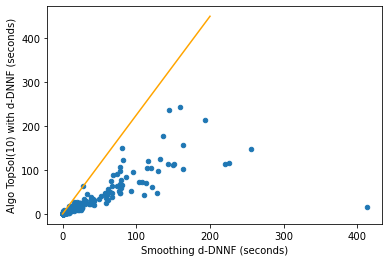

In [11]:
smooth_key = "jddnnf smoothing 0"
top_key= "jddnnf top 0"
plot_df = clean_df.copy()
plot_df = plot_df.rename(columns={smooth_key: "Smoothing d-DNNF (seconds)", 
                                  top_key: "Algo TopSol(10) with d-DNNF (seconds)"})
plot_df.plot(x="Smoothing d-DNNF (seconds)", y="Algo TopSol(10) with d-DNNF (seconds)",kind="scatter")
plt.plot([0,200],[0,450],'-',color="orange")
plt.show()

In [12]:
clean_df["d4 compilation (seconds)"] = clean_df["d4 compilation (seconds)"].astype("float64", errors = 'raise')
clean_df["compile+total"] = clean_df["compile+total"].astype("float64", errors = 'raise')


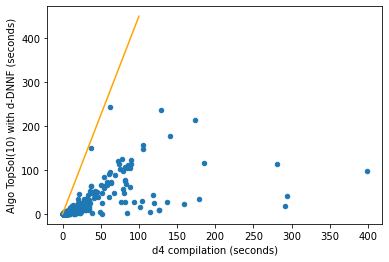

In [13]:
compil_key = "d4 compilation (seconds)"
top_key= "jddnnf top 0"
plot_df = clean_df.copy()
plot_df = plot_df.rename(columns={compil_key: "d4 compilation (seconds)", 
                                  top_key: "Algo TopSol(10) with d-DNNF (seconds)"})
plot_df.plot(x="d4 compilation (seconds)", y="Algo TopSol(10) with d-DNNF (seconds)",kind="scatter")
plt.plot([0,100],[0,450],'-',color="orange")
plt.show()

In [14]:
analyze_df=clean_df.copy()
d3bis_df= analyze_df[analyze_df["compile+total"]<timeout]
d3bis_df["jddnnf top 0"].describe()

count    1163.000000
mean        5.849942
std        21.545502
min         0.004000
25%         0.025000
50%         0.068000
75%         0.647500
max       242.415000
Name: jddnnf top 0, dtype: float64

In [15]:
d4_df =analyze_df[analyze_df["compile+total"]<timeout]
d4_df["d4 compilation (seconds)"].describe()

count    1163.000000
mean        7.571811
std        24.000635
min         0.032376
25%         0.064737
50%         0.166141
75%         2.997821
max       294.210074
Name: d4 compilation (seconds), dtype: float64

In [16]:
d5_df=analyze_df[analyze_df["compile+total"]<timeout]
d5_df["compile+total"].describe()


count    1163.000000
mean       21.229469
std        67.124684
min         0.147031
25%         0.281708
50%         0.632568
75%         4.489341
max       592.220530
Name: compile+total, dtype: float64

In [17]:
d6_df= analyze_df[analyze_df["compile+total"]<timeout]
d6_df["jddnnf smoothing 0"].describe()

count    1163.000000
mean        7.070174
std        26.414398
min         0.003000
25%         0.029000
50%         0.067000
75%         0.618500
max       412.777000
Name: jddnnf smoothing 0, dtype: float64

In [18]:
d7_df = analyze_df[analyze_df["compile+total"]<timeout]
d7_df["jddnnf parsing 0"].describe()

count    1163.000000
mean        0.575878
std         1.809842
min         0.008000
25%         0.019000
50%         0.035000
75%         0.150500
max        12.842000
Name: jddnnf parsing 0, dtype: float64